In [1]:
import os
from dotenv import load_dotenv
import geopandas as gpd

load_dotenv()

data = gpd.read_file('rockwall_ownership/rockwall_ownership.shp')

In [2]:
print(data.head())

     pid  valueyear  pyear                      fileasname  \
0  31527     2023.0   2024  VARUGHESE MATHAI K & ANNAMMA C   
1  32764     2023.0   2024     MCDANIEL JOHN W & DEBORAH J   
2  55019     2023.0   2024      SHORES ON LAKE RAY HUBBARD   
3  58812     2023.0   2024                FOSTER D MICHAEL   
4  21423     2023.0   2024        RUTH DIANE RUSSELL TRUST   

                     secondname  refid2  legalacre   marketarea schoolcode  \
0                          None  R31527        NaN   N4245-2017        SRW   
1                          None  R32764     11.070   N3792-2017        SRW   
2                          None  R55019      0.444  NC0097-2022        SRW   
3  C/O SPECTRUM ASSOCIATION MGM  R58812        NaN  NC0097-2022        SRW   
4   RUTH DIANE RUSSELL- TRUSTEE  R21423      0.057    NC100-CRW        SRW   

  citycode  ... ownersuite   ownercity ownerstate    ownerzip deedorder  \
0      CRT  ...       None     ROWLETT         TX  75088-6884       1.0   
1     No

In [3]:
print(data.columns)

Index(['pid', 'valueyear', 'pyear', 'fileasname', 'secondname', 'refid2',
       'legalacre', 'marketarea', 'schoolcode', 'citycode', 'countycode',
       'esdcode', 'legaldesc', 'legaldesc2', 'block', 'lot', 'tract', 'ascode',
       'ownerland', 'ownerimpro', 'ownermarke', 'mapid', 'geoid', 'streetnum',
       'streetpre', 'streetnam', 'streetsuf', 'streetcity', 'streetstat',
       'streetzip', 'owneraddr', 'ownersuite', 'ownercity', 'ownerstate',
       'ownerzip', 'deedorder', 'deeddt', 'volume', 'page', 'instrument',
       'geometry'],
      dtype='object')


In [6]:
from sqlalchemy import create_engine

DB_URL = os.getenv('DB_URL')

engine = create_engine(DB_URL)

data.to_postgis('rockwall_ownership', engine, if_exists='replace')

<Axes: >

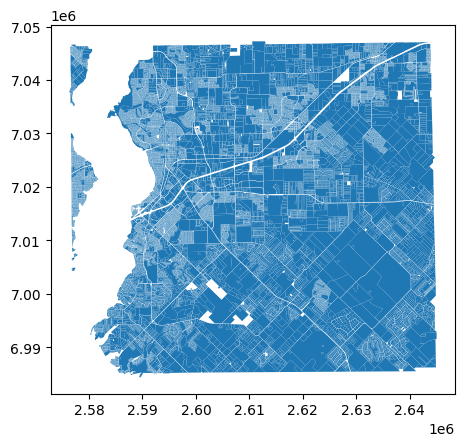

In [9]:
# extract data from postgres and plot
data_from_gis = gpd.read_postgis('select * from rockwall_ownership', engine, geom_col='geometry')
data_from_gis.plot()